### Stock Market Analysis 

 - Analyse data from the stock market for Reliance Industries Limited from last 5 years
 - Dataset downloaded from Yahoo Finance

## Predict stock Price using fbprophet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

In [2]:
df = pd.read_csv('RELIANCE.NS.csv')
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])
print('\nFeatures:',df.columns)
df.head()

Rows: 1234
Columns: 7

Features: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,502.500000,506.899994,493.350006,497.649994,476.555573,13793142.0
1,2016-01-05,500.149994,505.000000,498.500000,502.575012,481.271790,6832918.0
2,2016-01-06,503.799988,519.200012,500.200012,516.099976,494.223511,12233710.0
3,2016-01-07,510.524994,514.000000,504.024994,506.625000,485.150116,9024438.0
4,2016-01-08,510.000000,516.450012,508.350006,512.875000,491.135223,9743678.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2020-12-28,2006.699951,2018.000000,1995.300049,2003.300049,2003.300049,7947719.0
1230,2020-12-29,2009.000000,2012.300049,1982.550049,1990.050049,1990.050049,8589407.0
1231,2020-12-30,1995.250000,2007.199951,1975.550049,1995.500000,1995.500000,10173132.0
1232,2020-12-31,1993.500000,2011.900024,1978.599976,1985.300049,1985.300049,8667516.0
1233,2021-01-01,1988.000000,1997.000000,1982.000000,1987.500000,1987.500000,4622002.0


In [4]:
# Cheack for null values
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [5]:
# Dropping Nan
df = df.dropna()

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,1073.581478,1086.273198,1059.978784,1072.513427,1062.339936,1.013000e+07
std,477.845373,483.821427,469.961466,476.292836,480.307275,7.618741e+06
min,459.000000,466.950012,444.049988,453.274994,434.061554,1.283997e+06
25%,655.449982,663.500000,648.825012,652.750015,638.198028,5.630141e+06
50%,990.875000,1007.200012,977.225006,996.174988,981.089661,7.796421e+06
75%,1338.462463,1357.612488,1322.424988,1337.562470,1327.326263,1.166648e+07
max,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.523004e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1232 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.0+ KB


In [8]:
df['Date']=pd.to_datetime(df['Date'])

## FBProphet

In [9]:
from fbprophet import Prophet

In [10]:
#creating datframe of Date and daily closing
df1=df.reset_index()[['Date','Close']].rename({'Date':'ds','Close':'y'}, axis='columns')
df1.head()

,ds,y
0,2016-01-04,497.649994
1,2016-01-05,502.575012
2,2016-01-06,516.099976
3,2016-01-07,506.625000
4,2016-01-08,512.875000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1232 non-null   datetime64[ns]
 1   y       1232 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.4 KB


In [12]:
# Taking four year data as train
train=df1[df1['ds'] <= '2020-01-04']
# Taking one year data as test
test=df1[(df1['ds'] > '2020-01-04')]

In [13]:
# training shape
print('Training data Rows:',train.shape[0])
print('Test data Rows:',test.shape[0])

Training data Rows: 984
Test data Rows: 248


In [14]:
# creating prophet model
m = Prophet(daily_seasonality=True)

In [15]:
# Training model
m.fit(train)

In [16]:
# predicting future for 370 days
future = m.make_future_dataframe(periods=370)
future.tail()

,ds
1349,2021-01-03
1350,2021-01-04
1351,2021-01-05
1352,2021-01-06
1353,2021-01-07


In [17]:
# forecasting
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1344,2020-12-29,1831.782979,1430.003752,2278.649972
1345,2020-12-30,1830.220683,1435.575858,2278.284682
1346,2020-12-31,1832.441184,1427.799122,2265.921766
1347,2021-01-01,1833.394109,1430.083737,2277.715357
1348,2021-01-02,1839.750489,1450.885108,2268.447027
1349,2021-01-03,1841.358721,1419.899782,2287.285786
1350,2021-01-04,1838.465737,1429.751441,2286.041111
1351,2021-01-05,1841.281588,1441.305385,2283.441579
1352,2021-01-06,1841.286063,1429.602171,2294.449839
1353,2021-01-07,1844.980405,1437.505992,2294.229062


<AxesSubplot:xlabel='ds'>

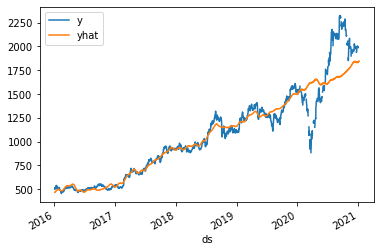

In [18]:
# plotting forecast
pd.concat([df1.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

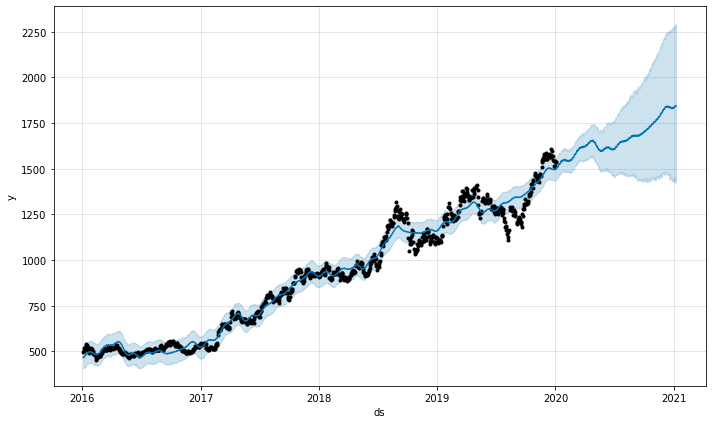

In [19]:
fig1 = m.plot(forecast)

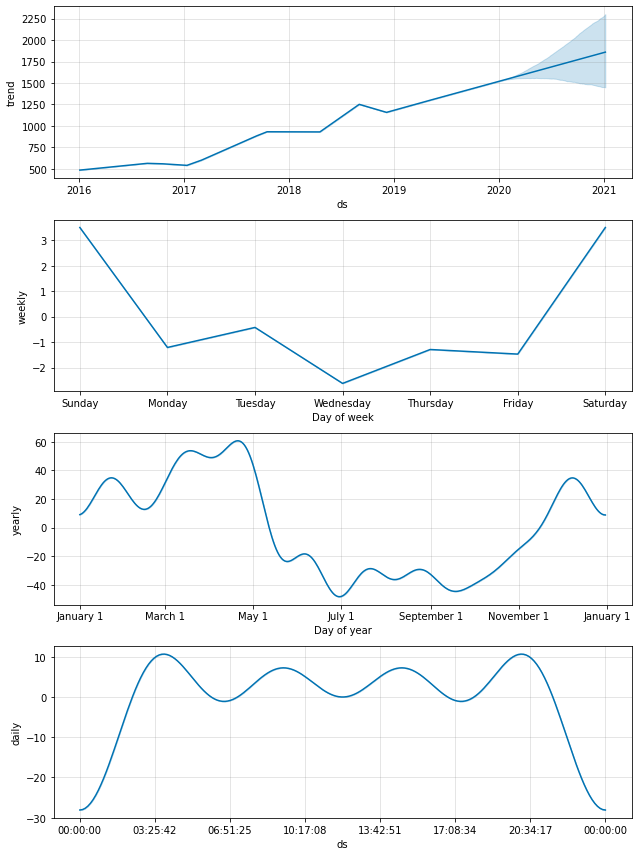

In [20]:
fig2 = m.plot_components(forecast)